In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = False # TeX rendering
plt.rcParams.update({'font.size' : 18})

In [3]:
SAVE_PRE = '../saves/'
save_paths = {
    'FedAvg'       : 'baselines/fed_avg_save',
    'Split-MS'     : 'baselines/sl_multi_server_save',
    'Split-SS'     : 'baselines/sl_single_server_save',
    'CSE-FSL_h1'       : 'CSE-FSL_h1',
    'CSE-FSL_h5'       : 'CSE-FSL_h5',
    'FSL-SAGE_h1 (ours)'      : 'FSL-SAGE_h1',
    'FSL-SAGE_h5 (ours)'      : 'FSL-SAGE_h5'
}
results_files = [
    'test_metrics',
    'test_metrics', 'test_metrics',
    'results', 'results', 'results', 'results' #'results'
]
def get_json_file(path):
    with open(path, 'r') as json_file:
        d = json.load(json_file)
    return d
    
save_dicts = {
    k:get_json_file(os.path.join(SAVE_PRE, v, f"{res_file}.json"))
    for res_file, (k, v) in zip(results_files, save_paths.items())
}

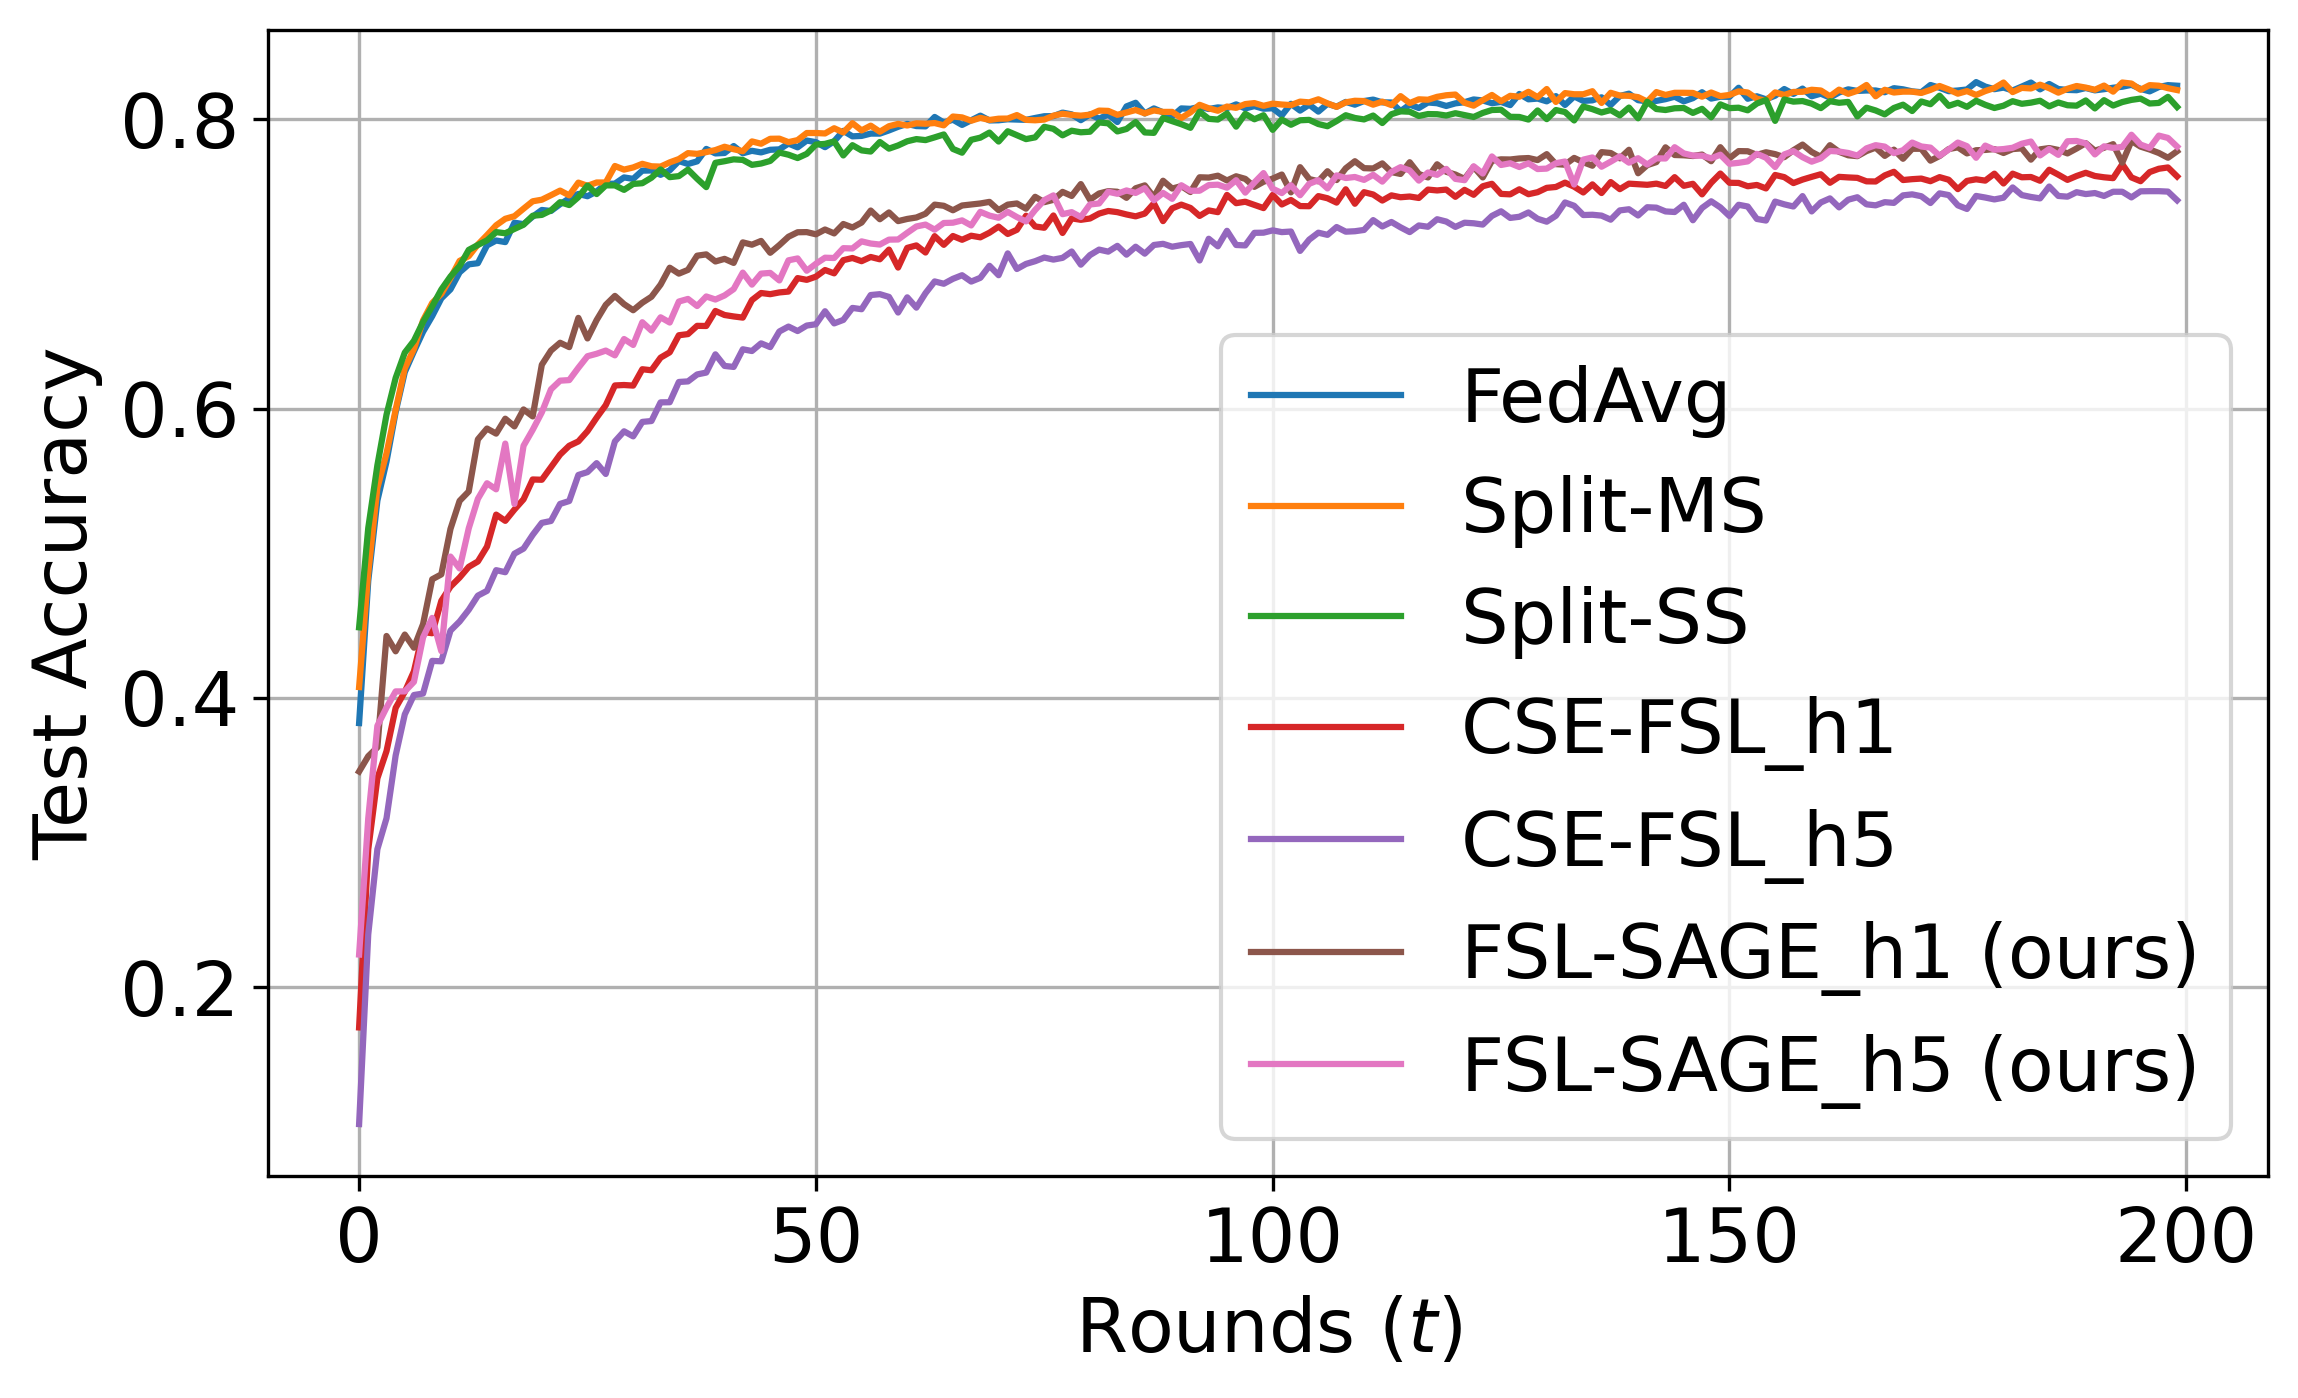

In [4]:
fig, ax = plt.subplots(1, 1, figsize=[8, 5], dpi=300)
for k, v in save_dicts.items():
    ax.plot(v['test_acc'], label=k)

ax.set_ylabel("Test Accuracy")
ax.set_xlabel("Rounds ($t$)")
ax.legend(loc='lower right')
ax.grid(True, which='both', axis='both')
plt.tight_layout()

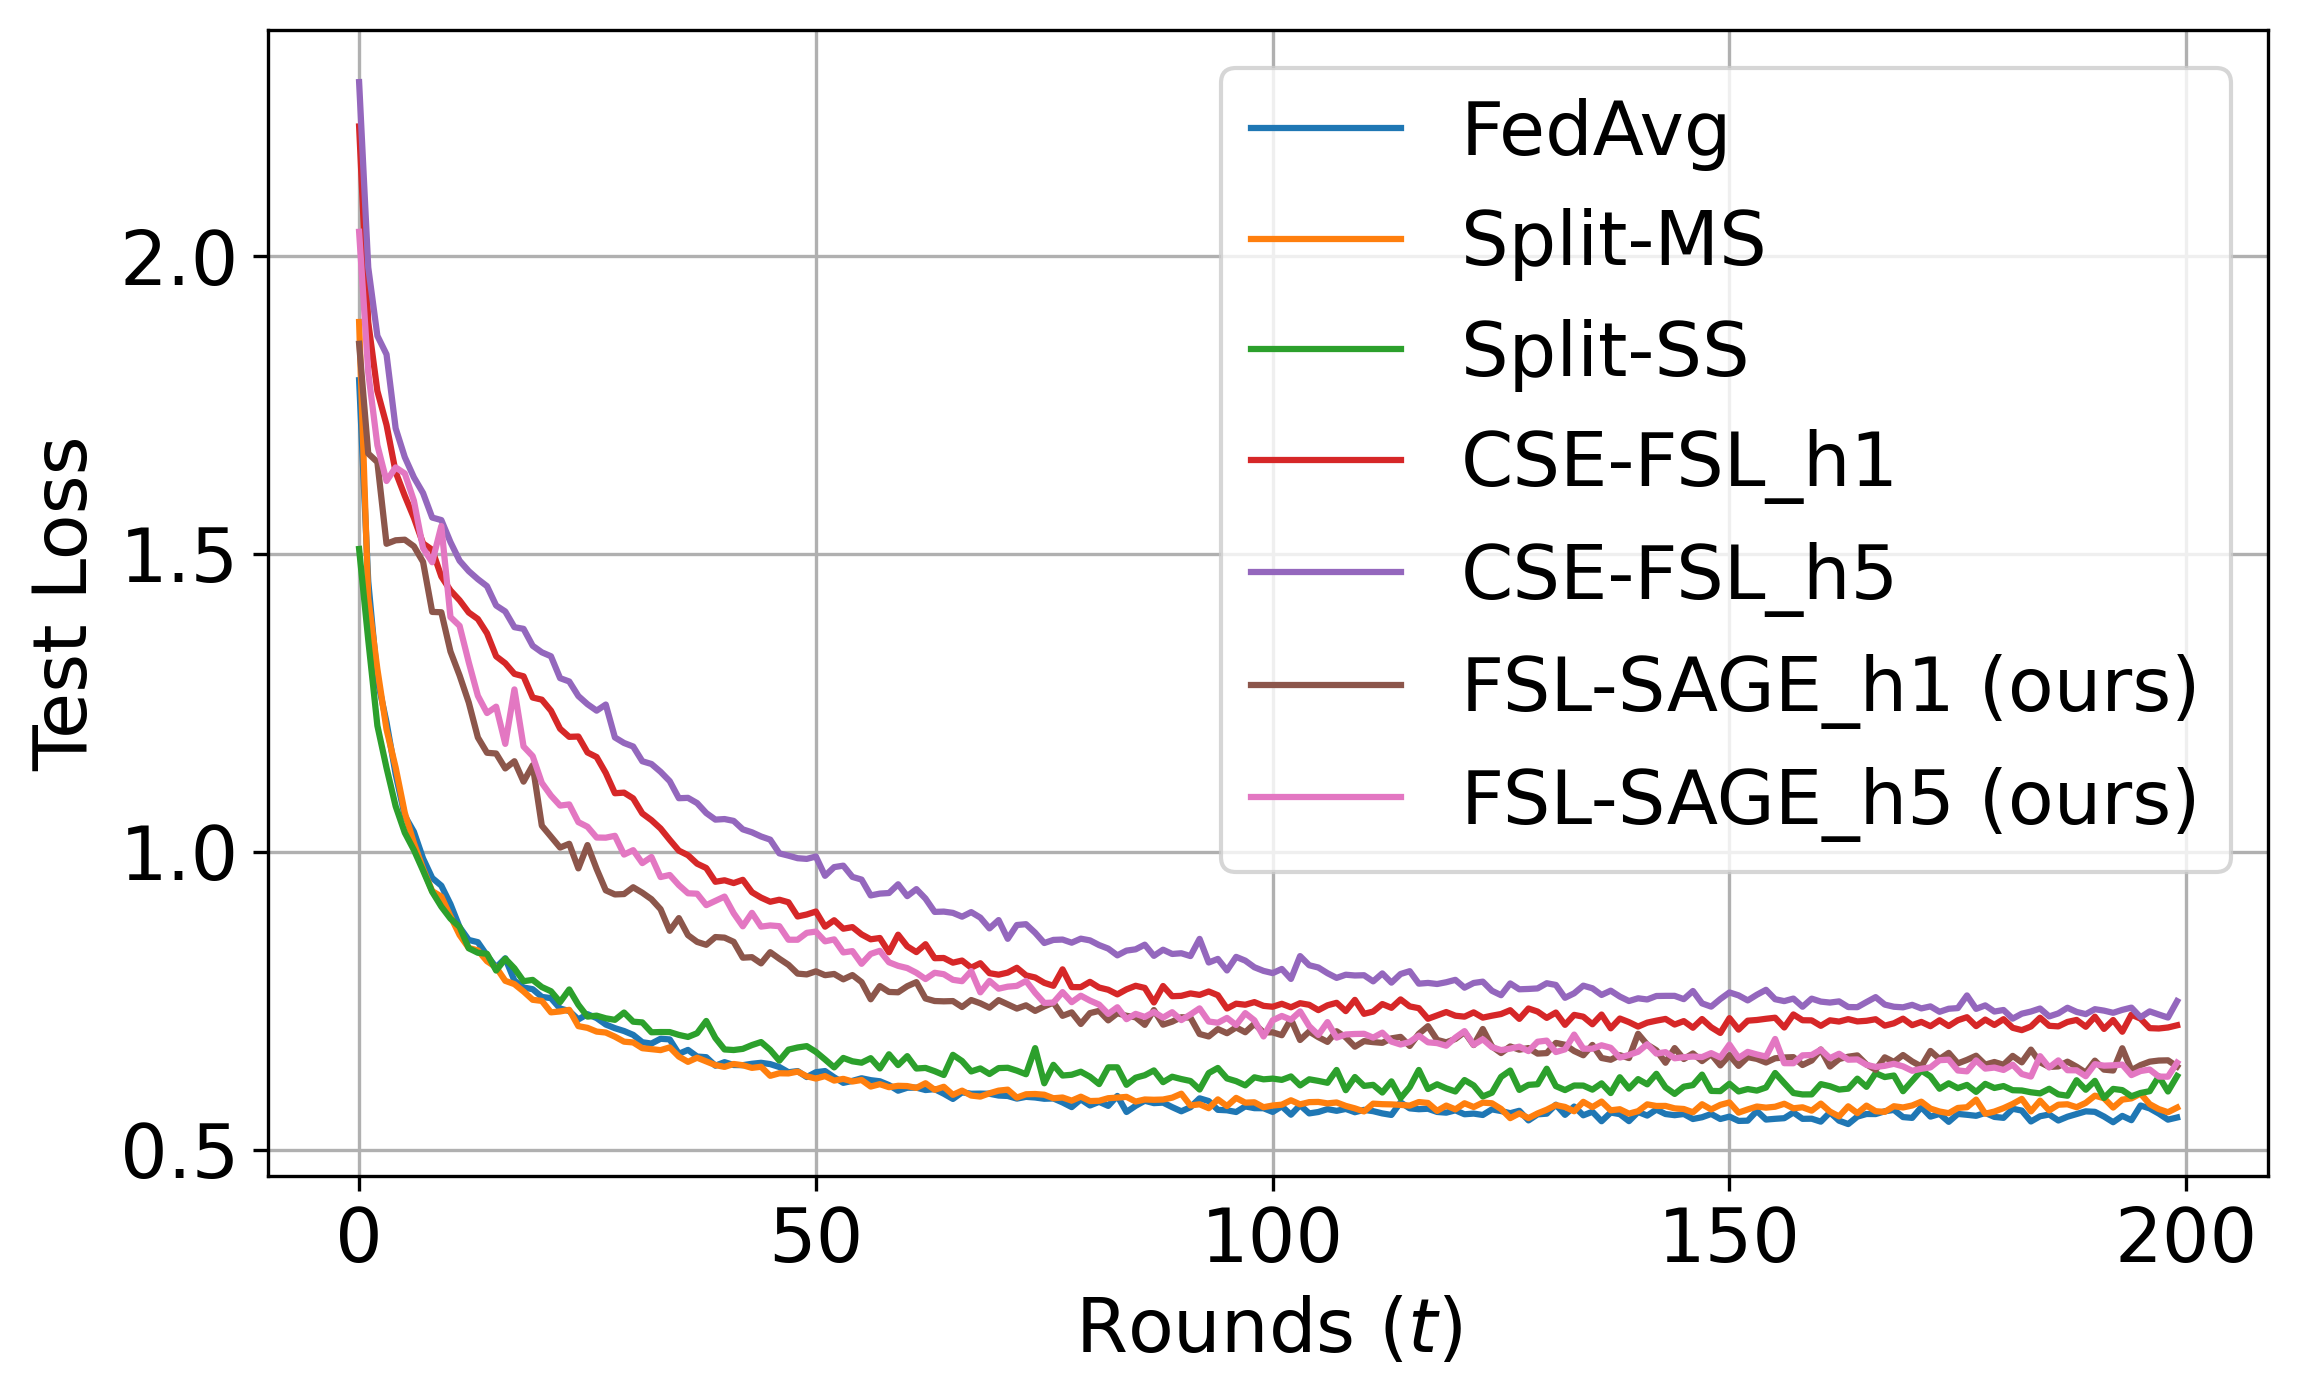

In [5]:
fig, ax = plt.subplots(1, 1, figsize=[8, 5], dpi=300)
for k, v in save_dicts.items():
    ax.plot(v['test_loss'], label=k)

ax.set_ylabel("Test Loss")
ax.set_xlabel("Rounds ($t$)")
ax.legend(loc='upper right')
ax.grid(True, which='both', axis='both')
plt.tight_layout()

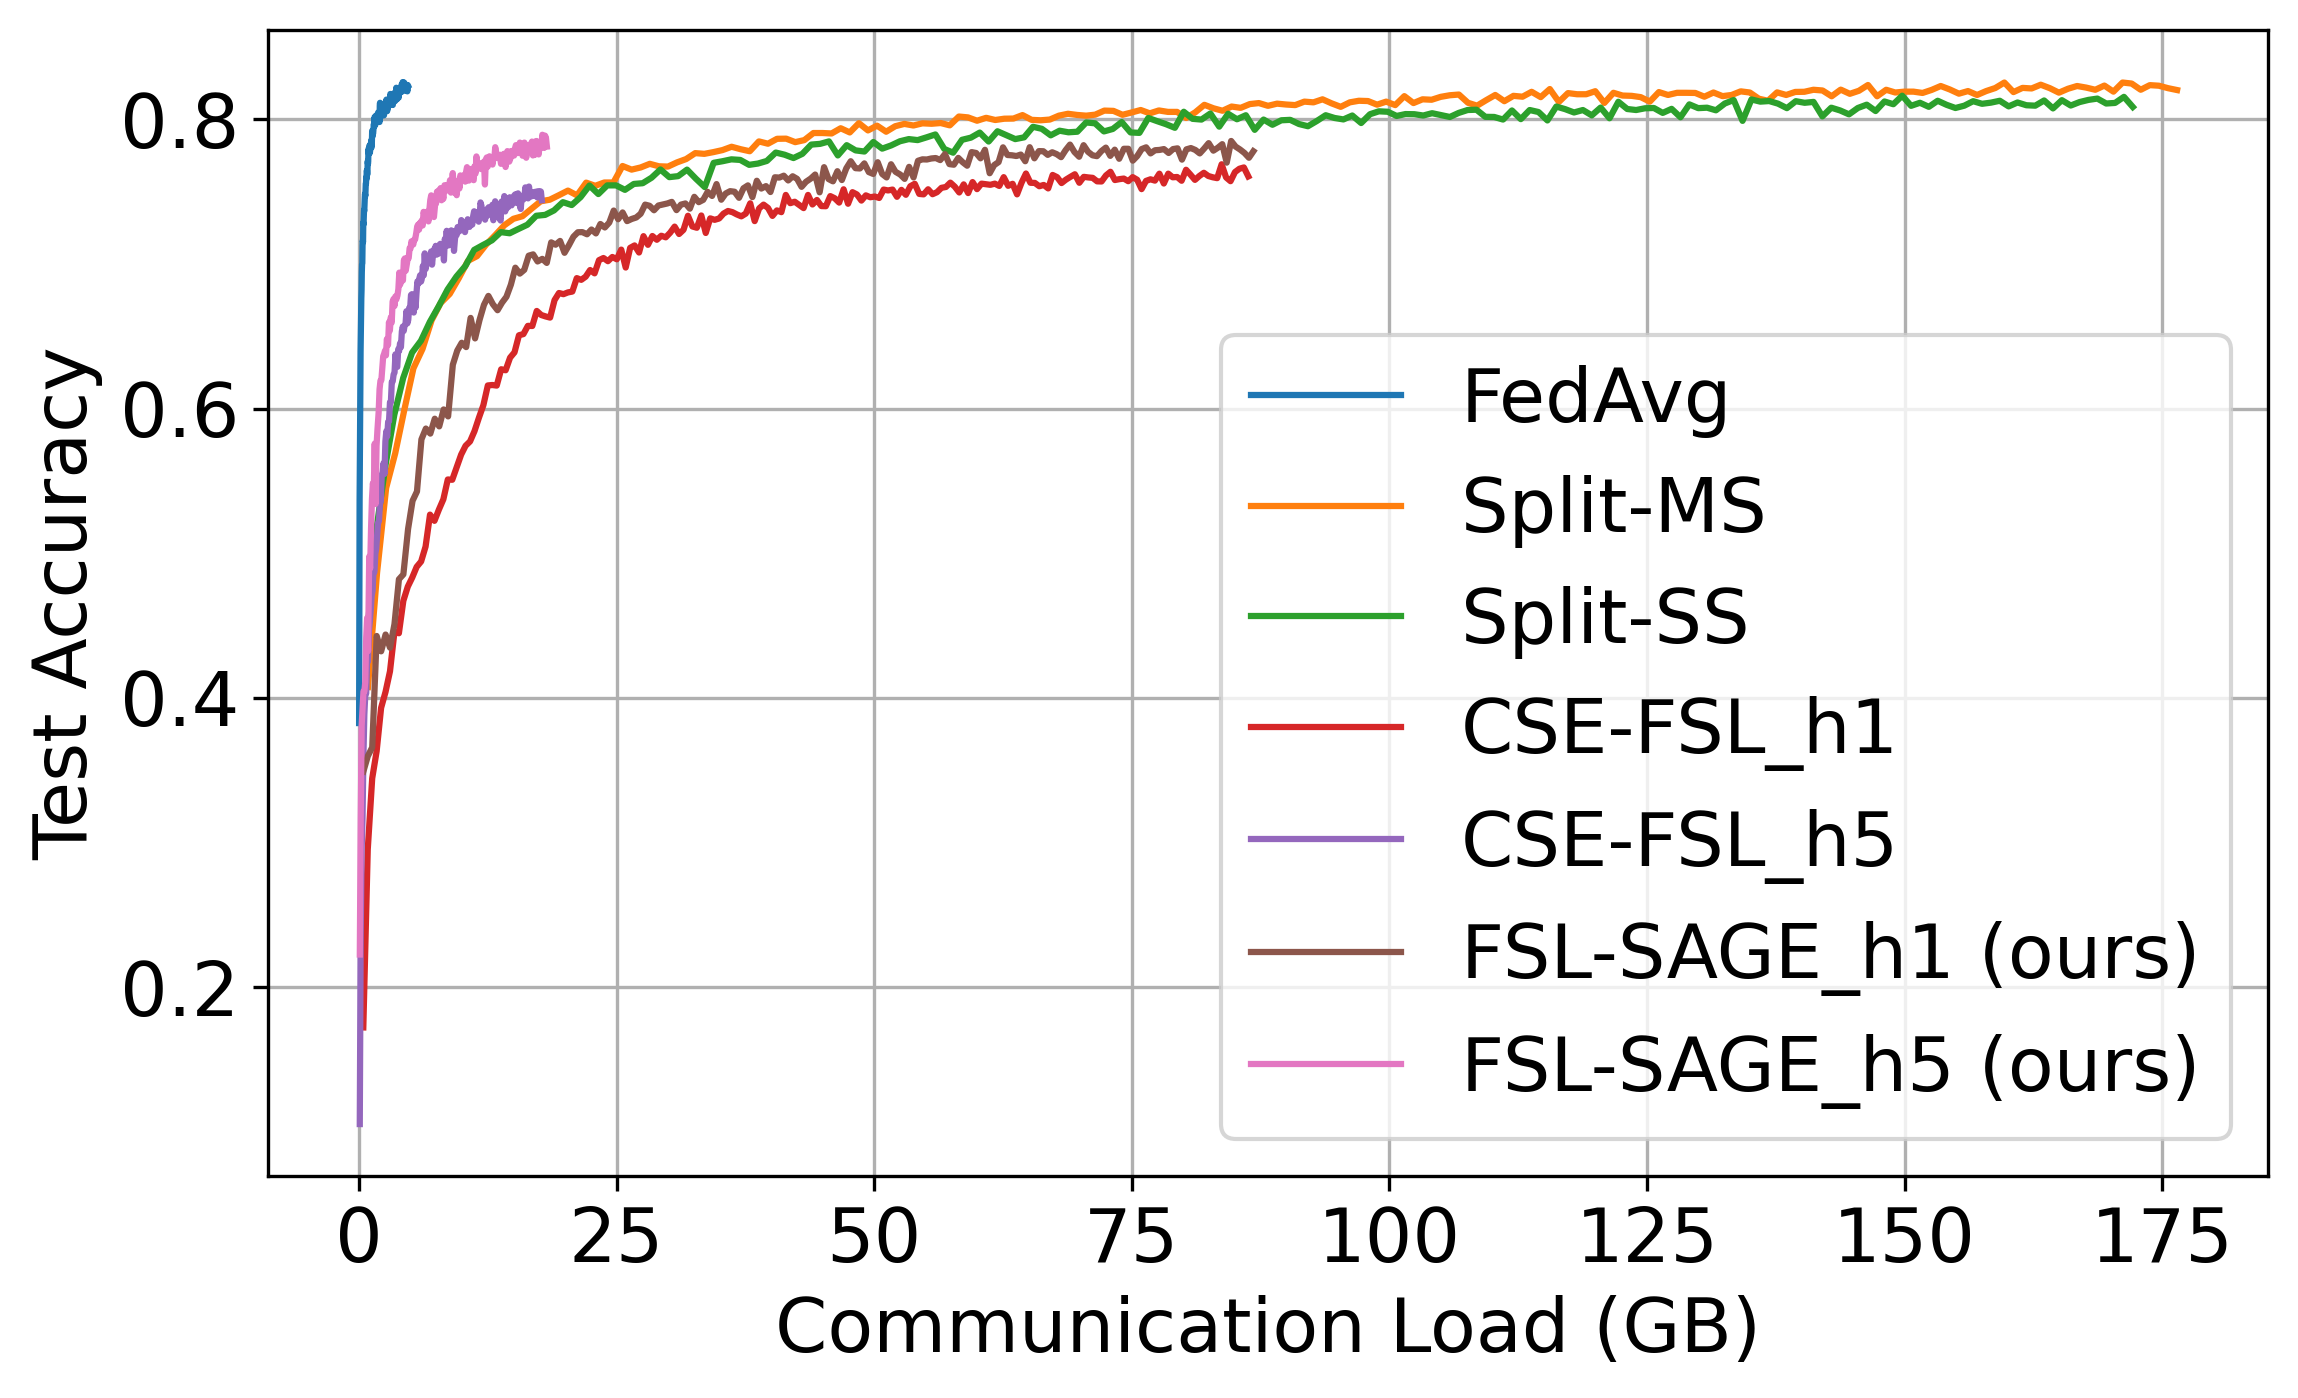

In [9]:
fig, ax = plt.subplots(1, 1, figsize=[8, 5], dpi=300)
for k, v in save_dicts.items():
    comm_load_gb = [c_load / (1024 ** 3) for c_load in v['comm_load'] ]
    ax.plot(comm_load_gb, v['test_acc'], label=k)

ax.set_ylabel("Test Accuracy")
ax.set_xlabel("Communication Load (GB)")
ax.legend(loc='lower right')
ax.grid(True, which='both', axis='both')
plt.tight_layout()

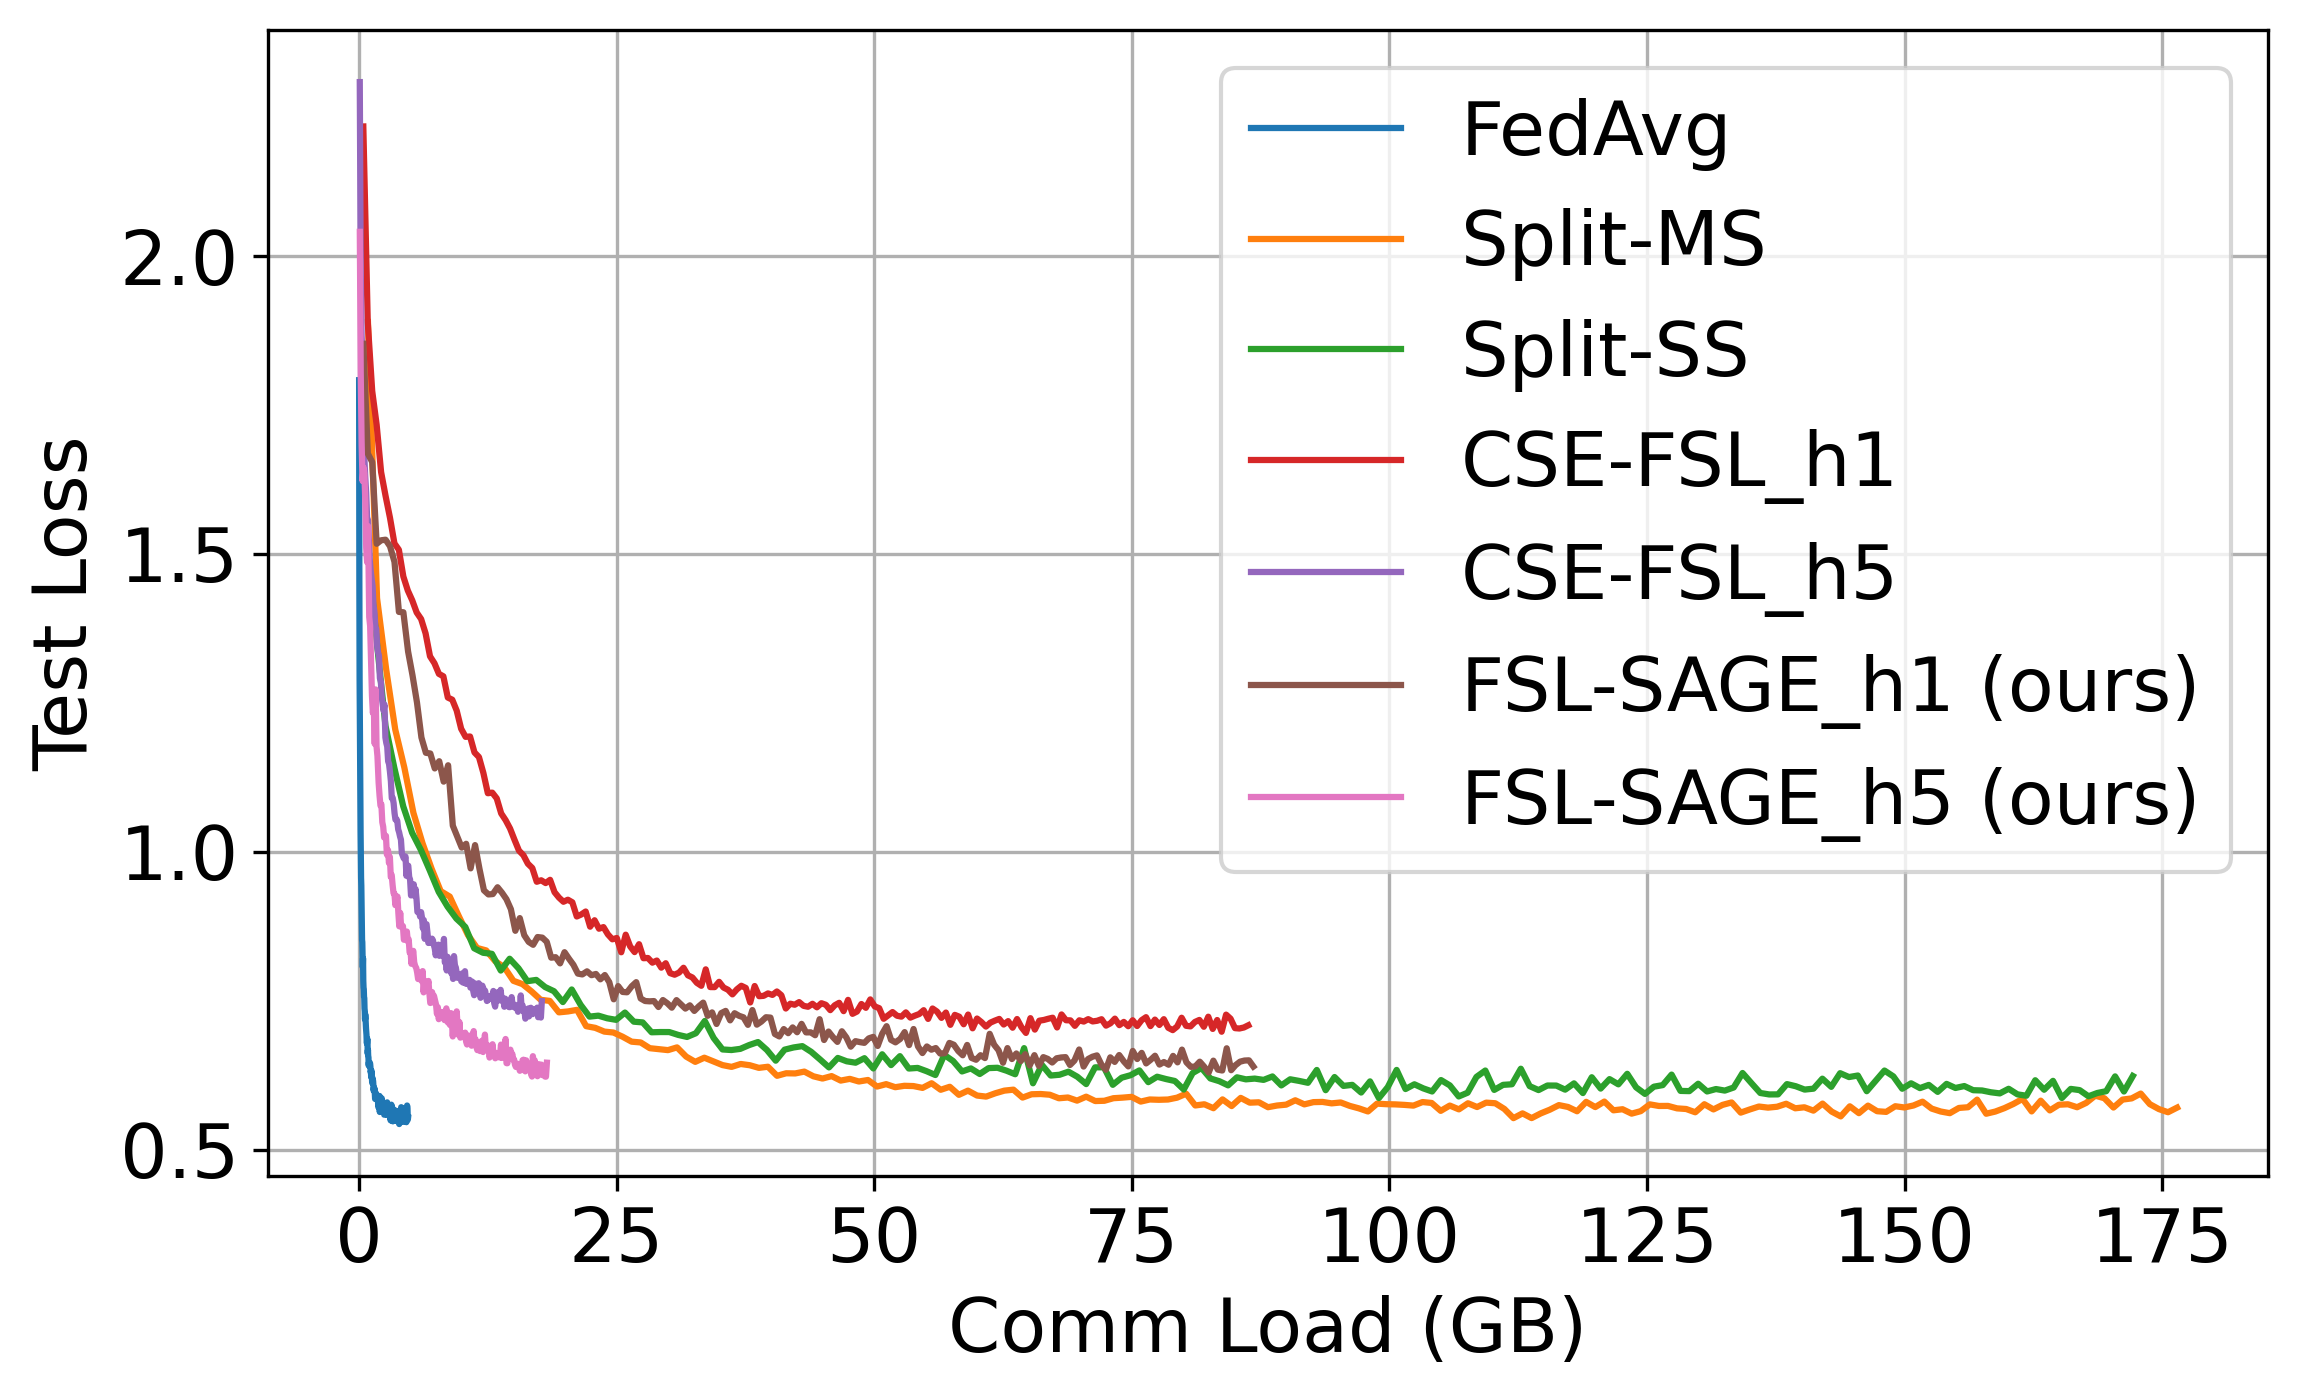

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=[8, 5], dpi=300)
for k, v in save_dicts.items():
    comm_load_gb = [c_load / (1024 ** 3) for c_load in v['comm_load'] ]
    ax.plot(comm_load_gb, v['test_loss'], label=k)

ax.set_ylabel("Test Loss")
ax.set_xlabel("Communication Load (GB)")
ax.legend(loc='upper right')
ax.grid(True, which='both', axis='both')
plt.tight_layout()